# Exercise 1

We first load a dataset and examine its dimensions.

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

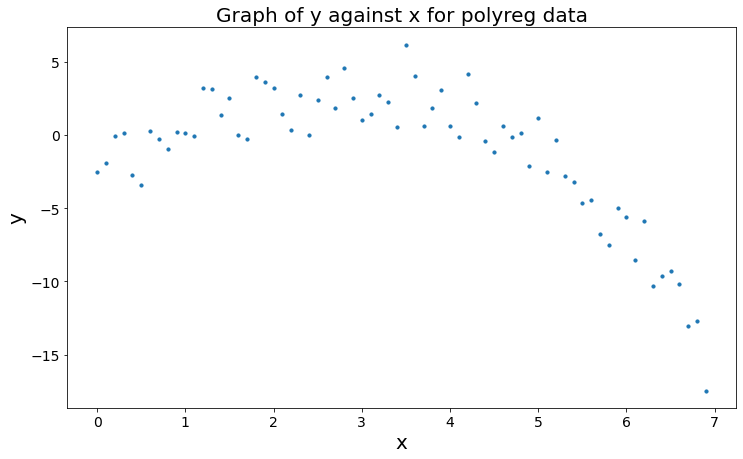

In [3]:
import matplotlib.pyplot as plt
# Your code for scatterplot here


dates = xy_data[:,0]      # First column of array (indexed by 0) contains the dates 
levels = xy_data[:,1]  # Second column of array (indexed by 1) contains the CO2 levels


# Set parameters to make sure figures are large enough. You can try changing these values
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

plt.scatter(dates, levels, s=10)   # s can be used to adjust the size of the dots
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of y against x for polyreg data')
plt.savefig('polyreg_data.pdf', bbox_inches = 'tight')
plt.show()

### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [4]:
#fuction works! 

def polyreg(data_matrix, k):
    # Your code here
    # The function should return the the coefficient vector beta, the fit, and the vector of residuals
    
    dates = data_matrix[:,0] #Since this is a N X 2 matrix ... only 2 columns
    levels = data_matrix[:,1]
    all_ones = np.ones(np.shape(dates))
    N = data_matrix.shape[0] 
    #upper section seems to be correct.
       
    X  = np.column_stack([dates**i for i in range(0,k+1)])  #FOR SOME REASON THIS IS PROBABLY CAUSING PROBLEM IN TEST CASE. 
    
    yvalues = levels 
    beta_quad = np.linalg.lstsq(X, yvalues, rcond=None)[0]
    #print('The dimensions of beta are',np.shape(beta_quad))
    
    beta_quad_shape = np.shape(beta_quad)
    
    fit_quad = X.dot(beta_quad)
    
    residual_quad = yvalues - fit_quad
    
    #a lit of values to return
    items = [beta_quad, fit_quad, residual_quad]

    return items
    
    

In [5]:
xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
data_matrix = np.transpose(np.vstack((xcol,ycol)))
data_matrix.shape


(21, 2)

In [6]:
k = 0
dates = data_matrix[:,0] 
levels = data_matrix[:,1]
all_ones = np.ones(np.shape(dates))
N = data_matrix.shape[0] 
print(N)
#X = np.fliplr(np.vander(dates, 3))
X  = np.column_stack([dates**k for k in range(0,k+1)])
print(X.shape)
print(X)
yvalues = levels 
beta_quad = np.linalg.lstsq(X, yvalues, rcond=None)[0]

print(beta_quad)
print('The dimensions of beta are',np.shape(beta_quad))
    
beta_quad_shape = np.shape(beta_quad)
print('Regression coefficients for quadratic model: beta_0 = ', np.round(beta_quad[0], 3))


21
(21, 1)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
[3.1]
The dimensions of beta are (1,)
Regression coefficients for quadratic model: beta_0 =  3.1


Use the tests below to check the outputs of the function you have written:

In [7]:
# Some tests to make sure your  function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
if np.round(beta_test[0], 3) == 2:
    print("Correct")
else:
    print(False)

assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)


Correct


### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

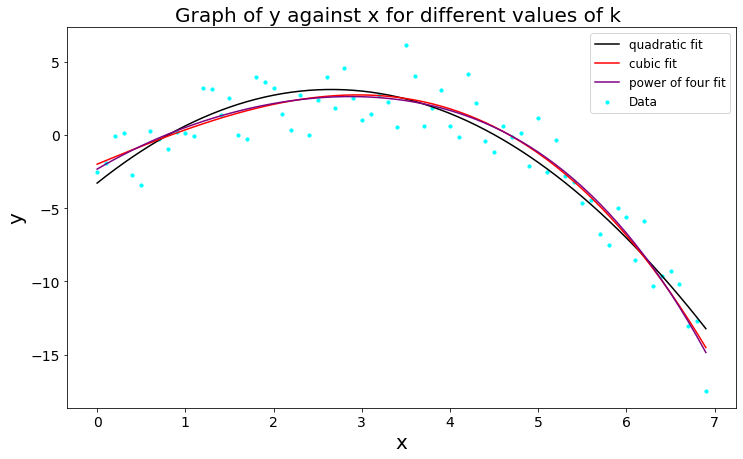

In [8]:
#Your code here

fit_0 = polyreg(xy_data, k=0)[1]
quadratic = polyreg(xy_data, k=2)[1]  #FOR k=2 case the fit is given by this
cubic = polyreg(xy_data, k=3)[1]  #FOR k=3 case
forth = polyreg(xy_data, k=4)[1] #FOR k=4 case

my_dates = xy_data[:,0] 
my_levels = xy_data[:,1] 
plt.rcParams['figure.figsize'] = [12, 7]
plt.scatter(my_dates, my_levels, s=10, color = 'cyan', label = 'Data')   
plt.plot(my_dates, quadratic, color = 'black', label = 'quadratic fit')
plt.plot(my_dates, cubic, color = 'red', label = 'cubic fit')
plt.plot(my_dates, forth, color = 'purple', label = 'power of four fit')
#plt.plot(dates, fit_0, label = 'Mean CO2 concentration')  
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of y against x for different values of k ')
plt.legend(fontsize = 'large')
#plt.savefig('CO2_lin_quad_fit.pdf', bbox = 'tight')
plt.show()

In [9]:
#CALCULATE R^2 for each of the three models
my_yvalues = my_levels
SSE_0 = np.linalg.norm(my_yvalues - fit_0)**2

SSE_2 = np.linalg.norm(my_yvalues - quadratic)**2
MSE_2 = SSE_2/(np.size(my_yvalues))

SSE_3 = np.linalg.norm(my_yvalues - cubic)**2
MSE_3 = SSE_3/(np.size(my_yvalues))

SSE_4 = np.linalg.norm(my_yvalues - forth)**2
MSE_4 = SSE_4/(np.size(my_yvalues))

print('R^2 for the quadratic model = ', np.round_(1- SSE_2/SSE_0, decimals = 4))
print('R^2 for the cubic model = ', np.round_(1- SSE_3/SSE_0, decimals = 4))
print('R^2 for the quartic model = ', np.round_(1- SSE_4/SSE_0, decimals = 4))

R^2 for the quadratic model =  0.8876
R^2 for the cubic model =  0.9005
R^2 for the quartic model =  0.9013


 #### State which model you choose and briefly justify your choice.
 
From the graph and the values of R^2, it is clear that the QUARTIC model (k=4) best fits the model because R^2 is closet to 1 
 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

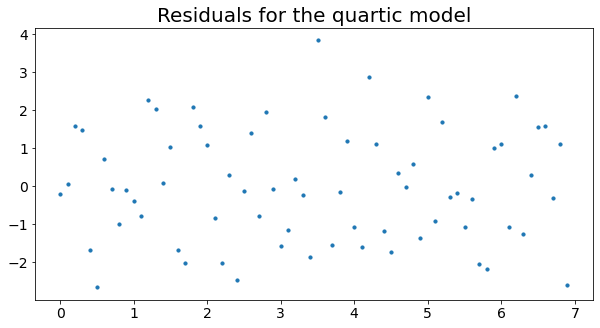

Mean of residuals for quartic model =  0.0 Variance of residuals =  2.16


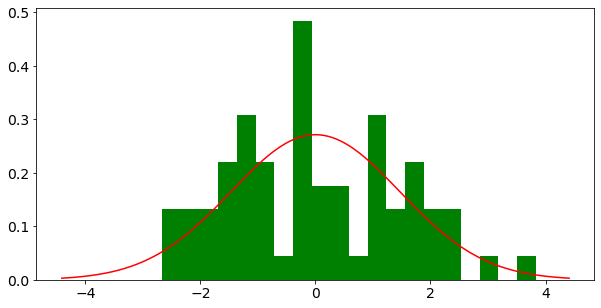

In [10]:
#Your code here
from scipy.stats import norm
resi_chosen = my_yvalues - forth #QUARTIC (power of 4) is chosen model
plt.rcParams['figure.figsize'] = [10, 5]
plt.scatter(my_dates, resi_chosen, s=10)
plt.title('Residuals for the quartic model')
#plt.savefig('quad_resid.png', bbox_inches = 'tight')
plt.show()

print('Mean of residuals for quartic model = ', np.round(np.mean(resi_chosen), 3), 
      'Variance of residuals = ', np.round(np.var(resi_chosen),3)) 

# Plot normed histogram of the residuals
n, bins, patches = plt.hist(resi_chosen, bins=20, density=True, facecolor='green');

# Plot Gaussian pdf with same mean and variance as the residuals
res_chosen_stdev = np.std(resi_chosen)  #standard deviation of residuals
xvals = np.linspace(-3*res_chosen_stdev,3*res_chosen_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_chosen_stdev), 'r')
plt.show()
